In [2]:
from numpy import array,float64,int64  
from matplotlib import pyplot
from pandas import read_csv,get_dummies
from pandas import DataFrame
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
path = os.path.dirname(os.getcwd())

df_train = load_dataset(path+'/data/2015_train.csv')
df_test = load_dataset(path+'/data/2015_test.csv')

train_set = get_df_values(df_train) 
test_set = get_df_values(df_test)

X,y = split_sequences(sequences=train_set, n_steps = 10,)

model = compile_model2(n_steps_in = 10,n_features_in = 51)
print(model.summary())

history = train_model(model=model,X=X,y=y,_validation_split = 0.3,_epoch=100,_batch_size=32,
_modelCheckpoint_path=path + "/MPS/TempOriginal",_modelCheckpoint_monitor='val_accuracy')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               60800     
_________________________________________________________________
dense (Dense)                (None, 51)                5151      
Total params: 65,951
Trainable params: 65,951
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
10868/10868 [==============================] - 71s 6ms/step - loss: 1459.2183 - accuracy: 0.8249 - val_loss: 1.2892 - val_accuracy: 0.9751
INFO:tensorflow:Assets written to: C:\swat\checkpoint\assets
Epoch 2/100
10868/10868 [==============================] - 67s 6ms/step - loss: 2.5557 - accuracy: 0.9802 - val_loss: 0.4867 - val_accuracy: 0.9743
Epoch 3/100
10868/10868 [==============================] - 70s 6ms/step - loss: 1.3252 - accuracy: 0.9844 - val_loss: 0.8210 - val_accuracy: 0.9689


In [3]:
def load_dataset(name):
    df = read_csv(name)
    df.drop(['Timestamp','Status'],axis=1, inplace=True)
    return df

In [4]:
def get_df_values(df):
    return df.values

In [5]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [6]:
def compile_model(n_steps_in,n_features_in):
    # define model
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features_in)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(n_features_in))
    model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

    return model



In [7]:
def compile_model2(n_steps_in,n_features_in):
    # define model
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features_in)))
    model.add(Dense(n_features_in))
    model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

    return model

In [8]:
def train_model(model,X,y,_validation_split,_epoch,_batch_size,_modelCheckpoint_path,_modelCheckpoint_monitor):
    return model.fit(X,y,validation_split=_validation_split, epochs = _epoch, batch_size = _batch_size, callbacks= [EarlyStopping(), ModelCheckpoint(_modelCheckpoint_path, monitor=_modelCheckpoint_monitor,save_best_only=True)], verbose=1)

In [10]:
def predict_from_excel(_excel_row,n_steps_in,n_features_in):
    predvidanje = _excel_row
    x_input = test_set[predvidanje-13:predvidanje-3]
    
    x_input = x_input.reshape((1, n_steps_in, n_features_in))
    yhat = model.predict(x_input, verbose=1)
    return yhat


In [ ]:
model.load_weights('D:\\SWAT\\swat\\checkpoint')

In [ ]:
def plot_prediction(yhat,test_set,_excel_row):
    pyplot.figure(figsize=(100,50))
    pyplot.plot(yhat[0], label='predict')
    pyplot.plot(test_set[_excel_row-2], label='actual')

    pyplot.legend()
    pyplot.show()

In [52]:
#predict 10 seconds
row = 4500
seconds = 1000
prediction = []
actual = []
for i in range(seconds):
    yhat = predict_from_excel(row+i,10,51)
    prediction.append(yhat[0])
    actual.append(test_set[row+i-2])


===============] - 0s 13ms/step
1/1 [==============================] - 0s 13ms/step


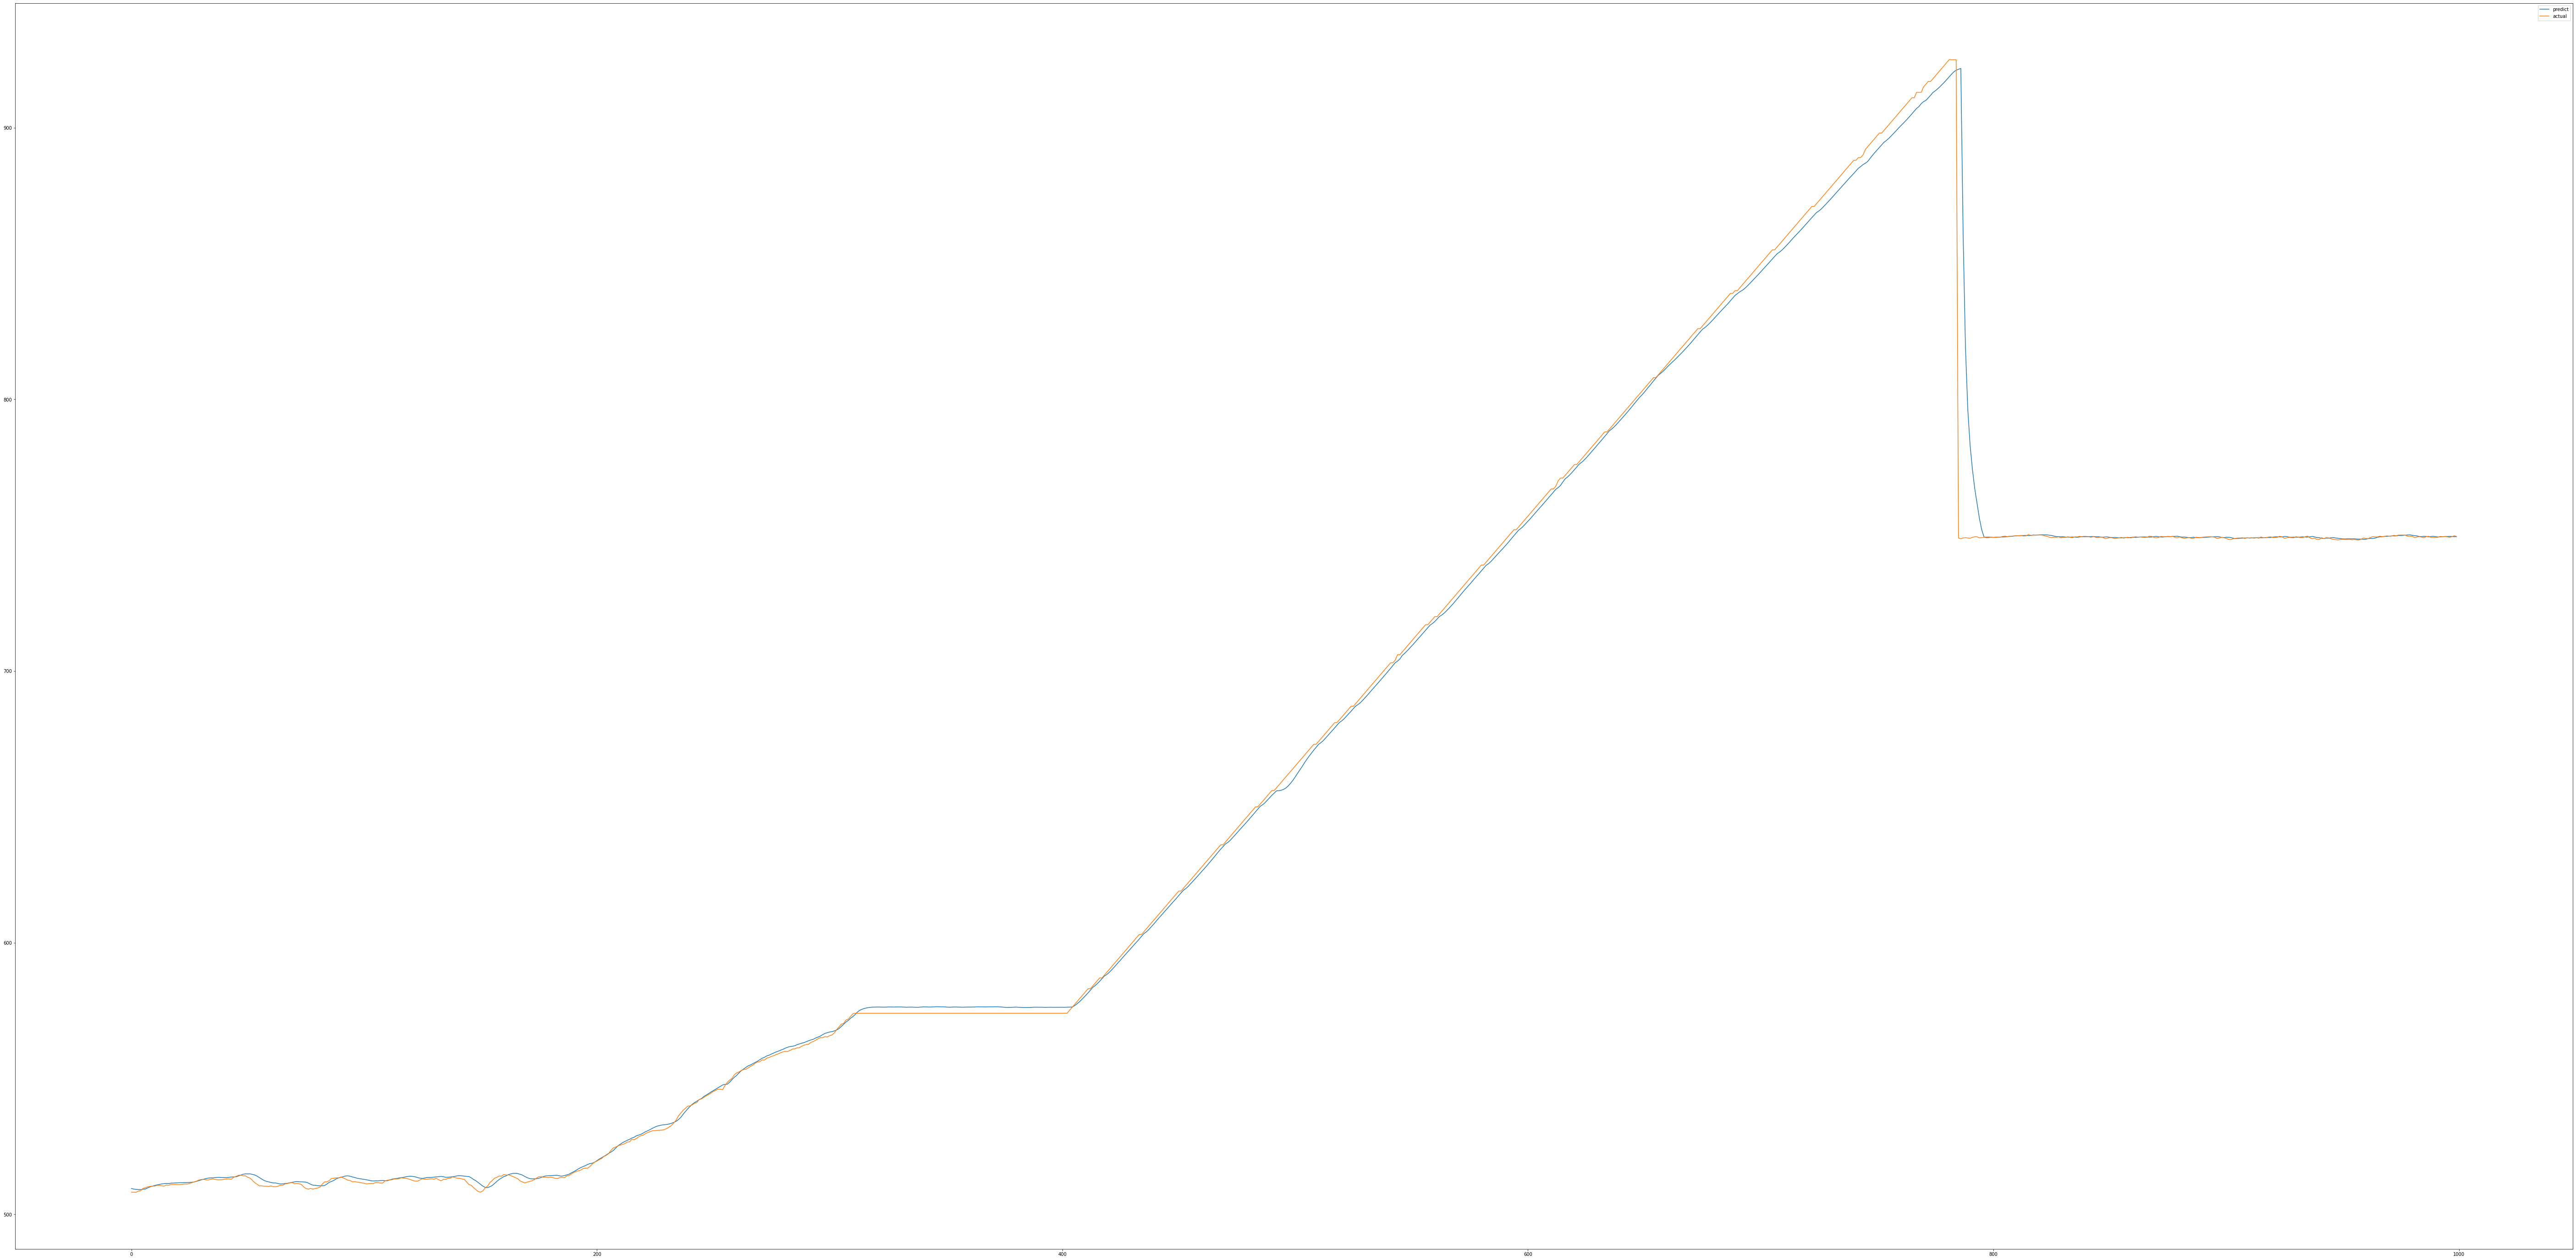

In [53]:
import math
pred = []
act = []

[pred.append(p[1]) for p in prediction]
#print(pred)

[act.append(a[1]) for a in actual]
#print(act)

pyplot.figure(figsize=(100,50))
pyplot.plot(pred, label='predict')
pyplot.plot(act, label='actual')
pyplot.legend()
pyplot.show()